### only use the abs version AR

#### see final script at :

/pic/projects/hyperion/chen423/tools/paper_tools/AR-SST/step5.moisture_decomposition.py

In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
scenario = 'HIST'

year = 2003
month = 10

para_b = int(10)

In [3]:
reffile = '/raid1/chen423/serdp/data/ref_data/wrf_ref/geo_em.d01.nc'
landmask = xr.open_dataset(reffile).LANDMASK.values[0,para_b:(450-para_b),para_b:(450-para_b)]

In [4]:
ETdir = '/home/chen423/.tmp/AR-SST/%s/moisture/ET/' % (scenario)
uIVTdir = '/home/chen423/.tmp/AR-SST/%s/moisture/uIVT/' % (scenario)
ARdir = '/home/chen423/.tmp/AR-SST/%s/AR_tagged/Gershunov/SERDP6km_adj/' % (scenario)

In [5]:
ETfile = ETdir + 'WRF_NARR.%s.SFCEVP.%d.%d.nc' % (scenario, year, month)
uIVTfile = uIVTdir + 'WRF_NARR.%s.uIVT.%d.%d.nc' % (scenario, year, month)

ARfile = ARdir + 'WRF_ARtag_adj.%s.Gershunov.%d.%d.ARabs.nc' % (scenario, year, month)

In [6]:
ETdata = xr.open_dataset(ETfile).SFCEVP.values[:,para_b:(450-para_b),para_b:(450-para_b)]
uIVTdata = xr.open_dataset(uIVTfile).uIVT.values[:,para_b:(450-para_b),para_b:(450-para_b)]
ARtag = xr.open_dataset(ARfile).AR_tag.values[:,para_b:(450-para_b),para_b:(450-para_b)]

In [7]:
def compute_moisture_intensity(in_ARtag, in_uIVT, in_ET, ref_mask):
    uIVT_total = in_uIVT[:,0][in_ARtag[:,0]==1].sum()*6000*86400
    ET_total = in_ET[(in_ARtag==1)&(ref_mask==0)].sum()*6000*6000
    
    if (ET_total+uIVT_total)==0:
        out_ratio = -9999
    else:
        out_ratio = ET_total/(ET_total+uIVT_total)
        
    return out_ratio

In [8]:
nt = ARtag.shape[0]
testdata = np.zeros(nt)
for t in np.arange(nt):
    testdata[t] = compute_moisture_intensity(ARtag[t], uIVTdata[t], ETdata[int(np.floor(t/4))], landmask)
    print(t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


In [9]:
testdata

array([-9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
        3.38631719e-03,  5.33258845e-02,  9.73280216e-02,  7.32008251e-02,
        8.70000576e-02,  7.21488037e-02,  1.89462780e-02,  7.66615608e-03,
        2.12834066e-02, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
        1.00000000e+00,  1.00000000e+00,  1.43092212e-03,  1.04635912e-02,
        6.16170979e-03,  7.52428366e-03,  1.49097818e-02,  1.86100069e-02,
        2.39455966e-02,  1.00000000e+00, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03,  4.97433771e-02,  6.07617904e-02,
        4.02780579e-02, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03,  4.66085569e-02,  5.21870243e-02,
        3.39287885e-02, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -9.99900000e+03, -9.99900000e+03, -9.99900000e+03,
       -9.99900000e+03, -

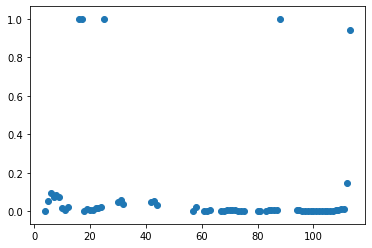

In [62]:
plt.scatter(np.arange(nt)[testdata>0], testdata[testdata>0])

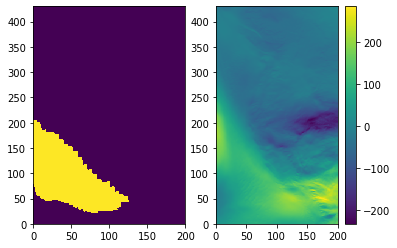

In [38]:
fig_debug = plt.figure()

plt.subplot(1,2,1)
plt.pcolormesh(ARtag[9,0:430,0:200])

plt.subplot(1,2,2)
plt.pcolormesh(uIVTdata[9,0:430,0:200])
plt.colorbar()

plt.show()
plt.close()
del(fig_debug)

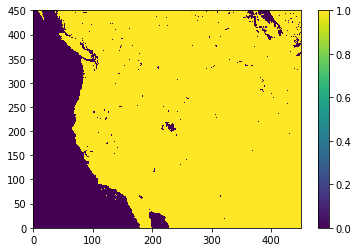

In [40]:
plt.pcolormesh(landmask)
plt.colorbar()